# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 

Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.

Для исследования используются данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Цель исследования:

1. Провести исследовательский анализ рынка российского кинопроката и выявить текущие тренды.
2. Провести исследовательский анализ рынка российского кинопроката и выявить текущие тренды.

Ход исследования пройдёт в четыре этапа:

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Исследование фильмов, получивших государственную поддержку.

## Обзор данных

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
df_1 = pd.read_csv('/datasets/mkrf_movies.csv')
df_2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [6]:
display(df_1.head())
df_1.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [7]:
display(df_2.head())
df_2.info()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В исходных данных мы имеем два файла:
* `mkrf_movies` содержит информацию из реестра прокатных удостоверений;
* `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

Объединим таблицы в один датафрейм по совпадающим значениям столбца `puNumber`. Для этого предварительно изменим тип данных столбца `puNumber` в данных `mkrf_movies` на числовой.

In [8]:
df_1['puNumber'] = pd.to_numeric(df_1['puNumber'], errors='coerce')

In [9]:
df = df_1.merge(df_2, on='puNumber', how='left')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7485 non-null float64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(5), object(11)
memory usage: 8.9 MB


Присоединение прошло успешно, все 3158 записей файла `mkrf_shows` нашли своё место.

In [10]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,"221,048,915.00",2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",nan
1,Особо важное задание,"111,013,716.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный",nan
2,Особо опасен,"221,038,416.00",2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
3,Особо опасен,"221,026,916.00",2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
4,Особо опасен,"221,030,815.00",2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7485 non-null float64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(5), object(11)
memory usage: 994.2+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
puNumber,"7,485.00","135,196,587.56","38,352,919.34","1,811,096.00","112,025,118.00","121,015,510.00","124,003,314.00","231,001,111.00"
refundable_support,332.00,"11,864,457.83","24,916,555.26",0.00,0.00,0.00,"15,000,000.00","180,000,000.00"
nonrefundable_support,332.00,"48,980,988.89","59,980,117.92",0.00,"25,000,000.00","30,000,000.00","40,375,000.00","400,000,000.00"
budget,332.00,"127,229,716.68","188,588,333.12",0.00,"42,000,000.00","68,649,916.00","141,985,319.50","2,305,074,303.00"
box_office,"3,158.00","76,478,696.16","240,353,122.82",0.00,"86,239.00","2,327,987.55","23,979,671.02","3,073,568,690.79"


In [13]:
df.query('puNumber.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),nan,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN,nan


In [14]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [15]:
len(df['film_studio'].unique())

5491

In [16]:
df.query('production_country.isnull()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...","111,001,216.00",2016-02-09T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,7.2,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,"214,000,410.00",2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,4.0,"мультфильм,комедия",nan


In [17]:
len(df['production_country'].unique())

951

In [18]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [19]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [20]:
len(df['genres'].unique())

743

**Вывод**

Замечания по рассматриваемому датафрейму:

* нарушение стиля в названии столбца `'puNumber'`;
* пропуски в записях в столбцах;
* неявные дубликаты в столбце `'type'`;
* используются неоптимальные типы данных в столбцах `'show_start_date', 'puNumber', 'type', 'production_country', 'age_restriction', 'financing_source', 'ratings'`.

## Предобработка данных

### Форматирование заголовков

In [21]:
df = df.rename(columns={'puNumber': 'pu_number'})
df.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

### Обработка пропусков

В столбце `'pu_number'` существует один пропуск, который может помешать изменить тип данных этого столбца. Заполним этот пропуск.

In [22]:
df['pu_number'] = df['pu_number'].fillna(0)

В столбце `'production_country'` были обнаружены два пропуска. Записи с данными пропусками явно принадлежат отечественным произведениям.

In [23]:
df['production_country'] = df['production_country'].fillna('Россия')

Пропуски в столбцах `'genres', 'director', 'producer' и 'film_studio'` заполним явными обозначениями

In [24]:
df[['genres', 'director', 'producer', 'film_studio']] = df[['genres', 'director', 'producer', 'film_studio']].fillna('неизвестен')

In [25]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
pu_number                7486 non-null float64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7486 non-null object
production_country       7486 non-null object
director                 7486 non-null object
producer                 7486 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   7486 non-null object
box_office               3158 non-null float64
dtypes: float64(5), object(11)
memory usage: 9.6 MB


### Обработка дубликатов


Проверим данные на наличие явных дубликатов:

In [26]:
print('Явных дубликатов в данных:', df.duplicated().sum())

Явных дубликатов в данных: 0


Избавимся от неявных дубликатов, обнаруженных в столбце `'type'`:

In [27]:
df['type'] = df['type'].str.strip()
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Можно предположить, что уникальные значения в каждой строке содержатся в столбцах `'title'` и `'pu_number'`. Поэтому стоит их проверить на наличие дубликатов.

Проверим наличие дубликатов в столбце `'title'`:

In [28]:
df['title'].value_counts()

День святого Валентина_                             5
Не брать живым /По книге Раджива Чандрасекарана/    4
Двойной копец                                       4
Знакомство с Факерами 2.                            4
Прощание                                            4
                                                   ..
Необычайные приключения Адель                       1
10 лет спустя                                       1
Фламенко, фламенко                                  1
Спасибо деду                                        1
Мушкетеры в 3D                                      1
Name: title, Length: 6772, dtype: int64

Имеют место быть повторяющиеся значения. Рассмотрим их внимательнее, на каком-либо примере:

In [29]:
df.query('title=="День святого Валентина_"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,"221,083,810.00",2010-07-15T12:00:00.000Z,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.7,"мелодрама,комедия",nan
3991,День святого Валентина_,"221,068,010.00",2010-05-14T12:00:00.000Z,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.7,"мелодрама,комедия",nan
4070,День святого Валентина_,"121,002,210.00",2010-02-03T12:00:00.000Z,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.7,"мелодрама,комедия",nan
4196,День святого Валентина_,"221,136,210.00",2010-11-30T12:00:00.000Z,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.7,"мелодрама,комедия",nan
5070,День святого Валентина_,"221,066,410.00",2010-06-01T12:00:00.000Z,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.7,"мелодрама,комедия",nan


И еще для примера:

In [30]:
df.query('title=="Жена путешественника во времени"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3794,Жена путешественника во времени,"221,010,310.00",2010-01-15T12:00:00.000Z,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Плэн Би",США,Роберт Швентке,"Деде Гарднер, Ник Уэкслер",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.6,"фантастика,фэнтези,драма",nan
4077,Жена путешественника во времени,"221,004,110.00",2010-01-19T12:00:00.000Z,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Плэн Би",США,Роберт Швентке,"Деде Гарднер, Ник Уэкслер",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.6,"фантастика,фэнтези,драма",nan
4096,Жена путешественника во времени,"221,055,510.00",2010-04-14T12:00:00.000Z,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Плэн Би",США,Роберт Швентке,"Деде Гарднер, Ник Уэкслер",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.6,"фантастика,фэнтези,драма",nan
4829,Жена путешественника во времени,"221,014,211.00",2011-01-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Плэн Би",США,Роберт Швентке,"Деде Гарднер, Ник Уэкслер",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.6,"фантастика,фэнтези,драма",nan


Очевидно, что записи с одинаковыми названиями фильмов имеют разные номера прокатных удостоверений и даты премьер.

Найдем общее количество повторов в столбце `'title'`: 

In [31]:
print('Всего дубликатов в столбце title:', df['title'].duplicated().sum())

Всего дубликатов в столбце title: 714


А теперь посмотрим, есть ли среди них фильмы с одинаковыми номерами прокатных удостоверений:

In [32]:
print('Всего дубликатов:', df[['title', 'pu_number']].duplicated().sum())

Всего дубликатов: 0


Можно утверждать, что повторяющиеся записи в столбце `'title'` не являются дубликатами, поскольку каждой такой записи соответствуют разные номера прокатных удостоверений. Возможно такие фильмы получали новые удостоверения для повторного проката в кинотеатрах, или на телевидении.

Теперь рассмотрим столбец `'pu_number'`:

In [33]:
df['pu_number'].duplicated().sum()

2

In [34]:
df.loc[df['pu_number'].duplicated()==True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,"221,154,310.00",2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.6,"драма,мелодрама,история",nan
5068,Анализируй то!,"221,054,410.00",2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.8,"комедия,криминал",nan


Нашлось два дубликата. Посмотрим что они из себя представляют.

In [35]:
df.query('pu_number==221154310')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,"221,154,310.00",2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.0,"мелодрама,комедия",nan
4639,Иоанна - женщина на папском престоле /По роман...,"221,154,310.00",2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.6,"драма,мелодрама,история",nan


In [36]:
df.query('pu_number==221054410')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,"221,054,410.00",2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.4,"комедия,криминал",nan
5068,Анализируй то!,"221,054,410.00",2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.8,"комедия,криминал",nan


Несомненно, разные фильмы имеют одинаковые номера прокатных удостоверений и одинаковые даты премьер. Скорее всего произошли ошибки при записях данных. И если с парой фильмов `Анализируй то! / Анализируй это!` можно понять как легко было ошибиться, то в случае с другой парой фильмов `Как жениться и остаться холостым / Иоанна - женщина на папском престоле` допущенная ошибка вызывает недоумение. В любом случае, несмотря на одинаковые номера прокатных удостоверений рассмотренные записи принадлежат разным фильмам и не являются дубликатами. 

### Замена типа данных

Тип данных столбца `'show_start_date'` переведём в формат времени

In [37]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
df['show_start_date'].sample()

3596   2017-05-05 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

Тип данных столбца `'pu_number'` переведём в тип `uint32`

In [38]:
df['pu_number'] = df['pu_number'].astype('uint32')

Тип данных столбцов `'type', 'production_country', 'age_restriction', 'financing_source'` переведём в тип `category`

In [39]:
df[['type', 'production_country', 'age_restriction', 'financing_source']] = df[['type', 'production_country', 'age_restriction', 'financing_source']].astype('category')

Тип данных столбца `ratings` в данных `mkrf_movies` переведём в числовой

In [40]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

In [41]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
pu_number                7486 non-null uint32
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null category
film_studio              7486 non-null object
production_country       7486 non-null category
director                 7486 non-null object
producer                 7486 non-null object
age_restriction          7486 non-null category
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null category
ratings                  6490 non-null float64
genres                   7486 non-null object
box_office               3158 non-null float64
dtypes: category(4), datetime64[ns, UTC](1), float64(5), object(5), uint32(1)
memory usage: 7.4 MB


Изменив тип данных нам удалось уменьшить объем используемой памяти с 9.6 до 6.7 MB, то есть на 30%.

### Проверка категориальных значений

К столбцам, которые содержат категориальные значения можно отнести `'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'financing_source','genres'`.

Количество категорий в столбцах `'type', 'age_restriction', 'financing_source'` небольшое, и каждой записи датафрейма соответствует только одна категория.

In [42]:
df['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [43]:
len(df['film_studio'].unique())

5491

In [44]:
df['production_country'].unique()

[США, СССР, Франция, СССР, Венгрия, Германия-Великобритания, ..., КНР - Франция, Дания, Норвегия, Швеция, Исландия, Республика Кипр, США, Россия, Новая Зеландия - КНР, Дания - Канада - Швеция - Франция - Германия -...]
Length: 950
Categories (950, object): [США, СССР, Франция, СССР, Венгрия, ..., Дания, Норвегия, Швеция, Исландия, Республика Кипр, США, Россия, Новая Зеландия - КНР, Дания - Канада - Швеция - Франция - Германия -...]

In [45]:
len(df['production_country'].unique())

950

In [46]:
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [47]:
len(df['director'].unique())

4812

In [48]:
df['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'неизвестен',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [49]:
len(df['producer'].unique())

5350

In [50]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'неизвестен', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

In [51]:
len(df['genres'].unique())

743

Проблема столбцов `'film_studio', 'production_country', 'director', 'producer','genres'` в том, что некоторые записи в этих столбцах представляют собой не категории, а список из комбинации категорий. То есть реальных категорий используется гораздо меньше, чем существует записей.

### Проверка количественных значений

Проверим данные на наличие ошибок среди количественных значений. Например величина бюджета фильма может быть меньше, чем сумма всех средств государственной поддержки:

In [52]:
df.query('budget < (refundable_support + nonrefundable_support)')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Нашлось 17 записей фильмов с присутствием господдержки и нулевыми бюджетами. Это явная ошибка, поскольку бюджет включает в себя всю государственную помощь. Исправим эту ошибку:

In [53]:
bad_budget = df.query('budget < (refundable_support + nonrefundable_support)')

In [54]:
print('Пропуски до:', df.loc[df['budget'] < (df['refundable_support'] + df['nonrefundable_support']), 'budget'].count())
df.loc[df['budget'] < (df['refundable_support'] + df['nonrefundable_support']), 'budget'] = (
    df.loc[df['budget'] < (df['refundable_support'] + df['nonrefundable_support']), 'refundable_support'] + 
    df.loc[df['budget'] < (df['refundable_support'] + df['nonrefundable_support']), 'nonrefundable_support']
)
print('Пропуски после:', df.loc[df['budget'] < (df['refundable_support'] + df['nonrefundable_support']), 'budget'].count())

Пропуски до: 17
Пропуски после: 0


In [55]:
df.query('pu_number in @bad_budget.pu_number')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","23,000,000.00","Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","75,000,000.00",Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","80,000,000.00",Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"20,000,000.00",Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","160,000,000.00",Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00","59,000,000.00",Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","35,000,000.00",Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","6,000,000.00",Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00","70,000,000.00",Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00","250,000,000.00",Фонд кино,5.60,фантастика,"1,038,321,489.00"


### Расчёты и добавление результатов в таблицу

Создадим столбец с информацией о годе проката:

In [56]:
df['film_distribution_year'] = df['show_start_date'].dt.year

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [57]:
def first_in_list(cell_value):
    """
    Возвращает первый токен строки разбитой по знаку ','.
    """    
    pieces = cell_value.split(',')
    return pieces[0]

In [58]:
df['main_genre'] = df['genres'].apply(first_in_list)

In [59]:
df['main_director'] = df['director'].apply(first_in_list)

In [60]:
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_distribution_year,main_genre,main_director
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,2015,боевик,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестен,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,2016,драма,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2016,фантастика,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2016,фантастика,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2015,фантастика,Тимур Бекмамбетов


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка:

In [61]:
df['total_support'] = df['refundable_support'] + df['nonrefundable_support']

In [62]:
df['government_support_share'] = df['total_support'] / df['budget']

In [63]:
df.query('budget.notnull()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,film_distribution_year,main_genre,main_director,total_support,government_support_share
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,драма,А.Атанесян,"26,500,000.00",0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,nan,неизвестен,"28,140.00",2014,неизвестен,А.Якимчук,"26,000,000.00",0.70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,комедия,Р.Давлетьяров,"107,847,945.00",0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),"28,000,000.00",0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,драма,М.Угаров,"25,000,000.00",0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00",...,"980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53",2019,история,А.Кравчук,"500,000,000.00",0.51
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",...,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00",2019,мультфильм,Д.Шмидт,"100,000,000.00",0.53
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00",...,"944,000,000.00",Фонд кино,5.70,"фантастика,боевик",nan,2019,фантастика,Ф.Бондарчук,"500,000,000.00",0.53
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,...,"46,154,000.00",Министерство культуры,5.90,драма,nan,2019,драма,И.Северов,"30,000,000.00",0.65


**Вывод**

В ходе подготовки данных к дальнейшему анализу были проведены следующие действия:

* исправлены нарушения стиля в названии столбца `'puNumber'`;
* в столбцах `'pu_number', 'production_country', 'genres', 'director', 'producer'` пропуски заполнены явными значениями;
* удалены неявные дубликаты в столбце `'type'`;
* заменены типы данных в столбцах `'show_start_date', 'puNumber', 'type', 'production_country', 'age_restriction', 'financing_source', 'ratings'`, что позволило на 30% уменьшит объем используемой памяти;
* добавлены столбцы с информацией о годе проката, с именем и фамилией главного режиссёра и основным жанром фильма, а также с расчётом доли от общего бюджета фильма государственной поддержки.

## Исследовательский анализ данных

Изучим, сколько фильмов выходило в прокат каждый год:

In [64]:
pure_df = df.query('box_office > 0')

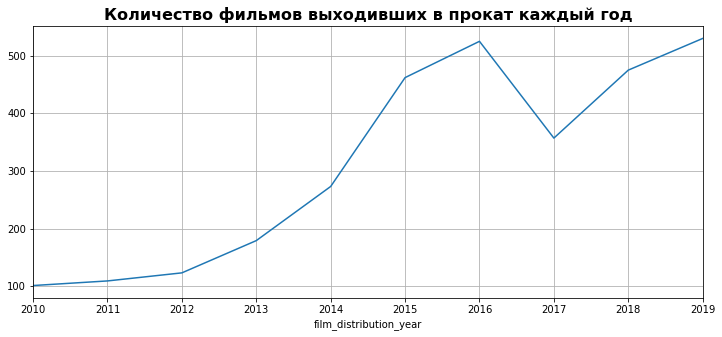

In [65]:
(pure_df
 .pivot_table(index='film_distribution_year', values='box_office', aggfunc='count')
 .plot(grid=True, figsize=(12, 5), legend=None))
plt.title('Количество фильмов выходивших в прокат каждый год', fontsize=16, fontweight='bold')
plt.show()

Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах:

In [66]:
len(pure_df) / len(df)

0.4186481432006412

Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

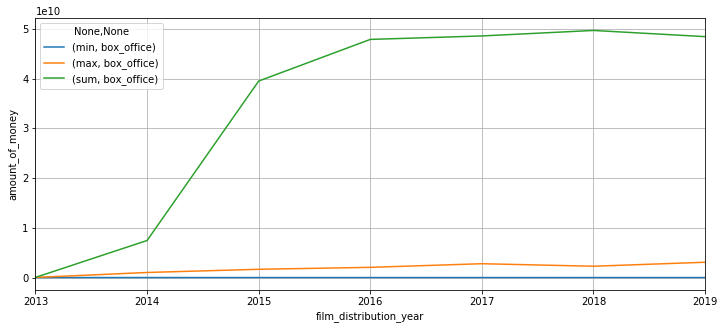

In [67]:
(pure_df
 .pivot_table(index='film_distribution_year', values='box_office', aggfunc=['min', 'max', 'sum'])
 .plot(grid=True, figsize=(12, 5)))
plt.xlim(2013, 2019)
plt.ylabel("amount_of_money")
plt.show()

Посчитаем среднюю и медианную сумму сборов для каждого года:

In [68]:
pure_df.pivot_table(index='film_distribution_year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
film_distribution_year,,
2010,"24,046.08","1,710.00"
2011,"129,383.17","3,000.00"
2012,"56,548.15","6,220.00"
2013,"166,478.81","3,580.00"
2014,"27,270,885.93","20,400.00"
2015,"85,492,132.46","5,003,450.15"
2016,"91,173,904.27","3,915,041.02"
2017,"136,032,793.33","9,968,340.00"


Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Узнаем фильмы с каким возрастным ограничением собрали больше всего денег в прокате. Проверим, меняется ли картина в зависимости от года, и с чем это может быть связано.

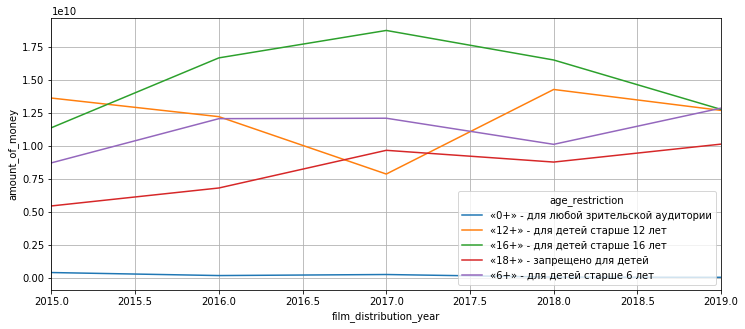

In [69]:
(pure_df
 .pivot_table(index='film_distribution_year', columns='age_restriction', values='box_office', aggfunc='sum')
 .plot(grid=True, figsize=(12, 5)))
plt.xlim(2015, 2019)
plt.ylabel("amount_of_money")
plt.show()

**Вывод**

* Больше всего в прокат выходило фильмов в 2016 и 2019 годах. с 2010 по 2016 годы наблюдался продолжительный постоянный рост количества фильмов в прокате. В 2017 году произошёл серъёзный спад, после которого вновь начался подъём;
* Доля фильмов, для которых указана информация о прокате в кинотеатрах составляет 41,86%;
* Начиная с 2013 до 2016 год можно увидеть взрывной рост суммарных сборов от проката фильмов в кинотеатрах. С 2016 до 2018 последовал очень плавный рост, а затем до 2019 небольшой спад;
* В период с 2015 до 2019 годы наибольшей популярностью в прокате пользовались фильмы с рейтингом "16+", достигнув максимума в 2017 году. Возможно это связано с расцветом популярности фильмов киновселенных MARVEL и DC в этот период.

## Исследование фильмов, которые получили государственную поддержку

Выделим вышедшие в прокат фильмы которые получили государственную поддержку:

In [70]:
government_support_df = df.query('government_support_share.notnull() and box_office.notnull()')

In [71]:
government_support_df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,film_distribution_year,main_genre,main_director,total_support,government_support_share
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,драма,А.Атанесян,"26,500,000.00",0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,nan,неизвестен,"28,140.00",2014,неизвестен,А.Якимчук,"26,000,000.00",0.70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,комедия,Р.Давлетьяров,"107,847,945.00",0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),"28,000,000.00",0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,драма,М.Угаров,"25,000,000.00",0.62


Рассмотрим, сколько фильмы получали суммарно государственной поддержки и сколько зарабатывали в кинотеатрах ежегодно:

In [72]:
government_support_df.pivot_table(index='film_distribution_year', values='budget', aggfunc='sum')

,budget
film_distribution_year,
2013,"255,435,390.00"
2014,"1,302,484,783.00"
2015,"7,696,670,223.00"
2016,"7,536,236,668.00"
2017,"6,951,572,568.00"
2018,"7,000,664,099.00"
2019,"11,235,073,892.00"


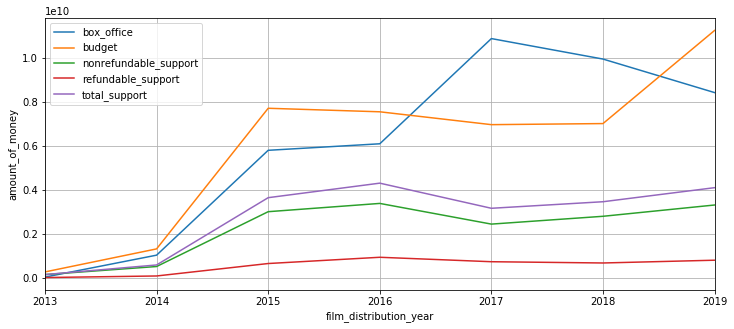

In [73]:
ax = (government_support_df
 .pivot_table(index='film_distribution_year', values='box_office', aggfunc='sum')
 .plot(grid=True, figsize=(12, 5)))             
(government_support_df
 .pivot_table(index='film_distribution_year', values=['budget', 'refundable_support', 'nonrefundable_support', 'total_support'], aggfunc='sum')
 .plot(ax=ax, grid=True, figsize=(12, 5)))
plt.ylabel("amount_of_money")
plt.show()

Из графика можно увидеть, что лишь в небольшой период времени с начала 2016 года и до середины 2018 года суммарные сборы от кинопроката фильмов с господдержкой окупали суммарные затраты на их создание. Также можно отметить, что зачастую почти половину суммарных бюджетов фильмов составляли государственные средства.

Определим наиболее популярные жанры фильмов с господдержкой:

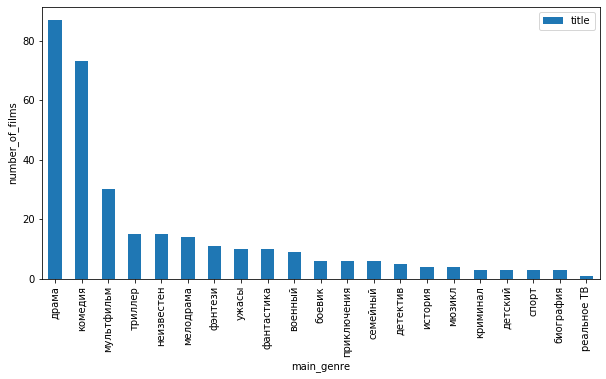

In [74]:
(government_support_df
 .pivot_table(index='main_genre', values='title', aggfunc='count')
 .sort_values(by='title', ascending=False)
 .plot(kind='bar', figsize=(10, 5)))
plt.ylabel("number_of_films")
plt.show()

Драма, комедия и мультфильм - три столпа отечественного киноискусства.

Посмотрим, какой режиссёр снял больше всего фильмов с госучастием:

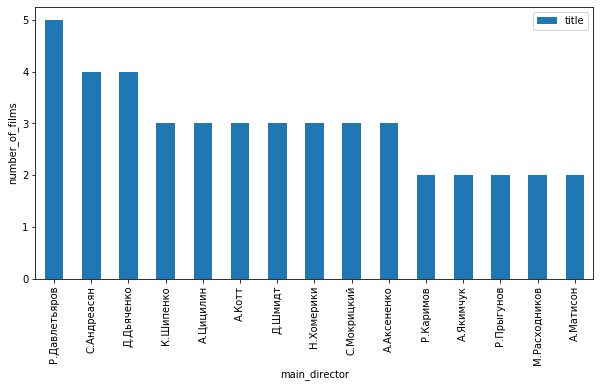

In [75]:
(government_support_df
 .pivot_table(index='main_director', values='title', aggfunc='count')
 .sort_values(by='title', ascending=False)
 .head(15)
 .plot(kind='bar', figsize=(10, 5)))
plt.ylabel("number_of_films")
plt.show()

Ренат Давлетьяров срежиссировал целых пять фильмов с госучастием. Лишь на один меньше у Сарика Андреасяна и Дмитрия Дьяченко.

А теперь посмотрим, какой режиссёр получил больше всего денежных средств от государства:

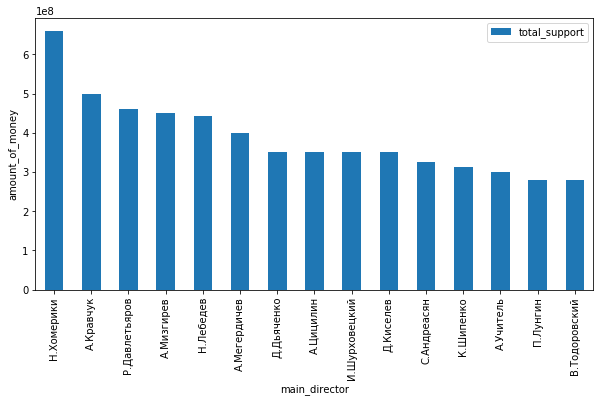

In [76]:
(government_support_df
 .pivot_table(index='main_director', values='total_support', aggfunc='sum')
 .sort_values(by='total_support', ascending=False)
 .head(15)
 .plot(kind='bar', figsize=(10, 5)))
plt.ylabel("amount_of_money")
plt.show()

Ренат Давлетьяров и тут в тройке лидеров, хотя и замыкает её. Николай Хомерики безоговорочный лидер этого рейтинга, за ним следует Андрей Кравчук.

Найдем режиссёра снимающего лучшие фильмы при поддержке государства:

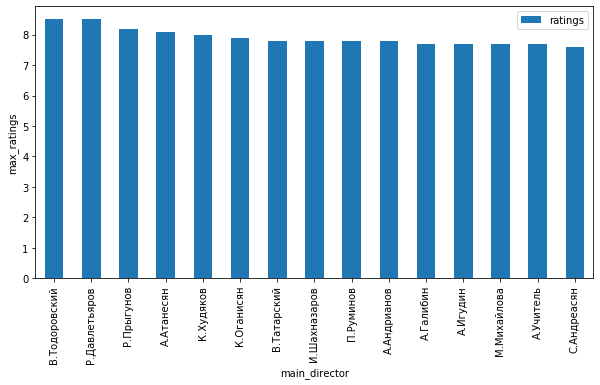

In [77]:
(government_support_df
 .pivot_table(index='main_director', values='ratings', aggfunc='max')
 .sort_values(by='ratings', ascending=False)
 .head(15)
 .plot(kind='bar', figsize=(10, 5)))
plt.ylabel("max_ratings")
plt.show()

И снова Ренат Давлетьяров! Он делит первое место с Валерием Тодоровским.

Рассмотрим рейтинги всех фильмов с господдержкой:

In [78]:
government_support_df.pivot_table(index='film_distribution_year', values='ratings', aggfunc=['max', 'min'])

,max,min
,ratings,ratings
film_distribution_year,,
2013,8.10,5.30
2014,6.90,3.80
2015,8.50,2.80
2016,8.50,1.00
2017,8.00,2.90
2018,7.70,2.50
2019,8.20,3.20


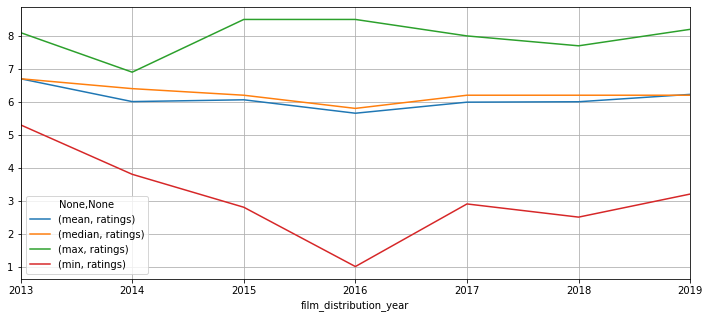

In [79]:
(government_support_df
 .pivot_table(index='film_distribution_year', values='ratings', aggfunc=['mean', 'median', 'max', 'min'])
 .plot(grid=True, figsize=(12, 5)))
plt.show()

Среднее и медиана рейтинга почти совпадают, что говорит нам о том, что распределение рейтингов близко к нормальному. Максимальный рейтинг фильмов из года в год держится почти стабильно и достигает 8.5 в 2015 и 2016 годах. В то же время минимальный рейтинг фильмов очень проседает с 5.3 в 2013 году до 1.0 в 2016 году.

В результате проведения исследования фильмов, которые получили государственную поддержку можно сделать следующие **выводы**:

* За рассмотренный период с 2013 по 2019 годы можно увидеть тенденцию к увеличению суммарных бюджетов фильмов, в том числе за счёт увеличения государственной поддержки;
* Наиболее популярные жанры кинокартин с госучастием - дама, комедия и мультфильм;
* Рената Давлетьярова можно назвать наиболее успешным режиссёром фильмов с государственной поддержкой;
* В 2016 году вышли фильмы с наилучшим и наихудшим рейтингами. С тех пор максимальный рейтинг держится на хорошей высоте, а минимальный рейтинг неуклонно растёт.

## Общий вывод

В ходе проведения исследования рынка российского кинопроката за несколько лет былы получены следующие результаты:

* Больше всего в прокат выходило фильмов в 2016 и 2019 годах. с 2010 по 2016 годы наблюдался продолжительный постоянный рост количества фильмов в прокате. В 2017 году произошёл серъёзный спад, после которого вновь начался подъём;
* Доля фильмов, для которых указана информация о прокате в кинотеатрах составляет 41,86%;
* Начиная с 2013 до 2016 год можно увидеть взрывной рост суммарных сборов от проката фильмов в кинотеатрах. С 2016 до 2018 последовал очень плавный рост, а затем до 2019 небольшой спад;
* В период с 2015 до 2019 годы наибольшей популярностью в прокате пользовались фильмы с рейтингом "16+", достигнув максимума в 2017 году. Возможно это связано с расцветом популярности фильмов киновселенных MARVEL и DC в этот период.

При исследовании фильмов, которые получили государственную поддержку были выявлены следующие тенденции:

* За рассмотренный период с 2013 по 2019 годы можно увидеть тенденцию к увеличению суммарных бюджетов фильмов (с 255 миллионов до 11 миллиардов!), в том числе за счёт увеличения государственной поддержки;
* Наиболее популярные жанры кинокартин с госучастием - дама, комедия и мультфильм;
* Рената Давлетьярова можно назвать наиболее успешным режиссёром фильмов с государственной поддержкой;
* В 2016 году вышли фильмы с наилучшим (8.5) и наихудшим (1.0) рейтингами. С тех пор максимальный рейтинг держится на отметке около 8.0, а минимальный рейтинг неуклонно растёт с 1.0 до 3.2.